Importing Libraries

In [1]:
import pandas as pd
from sklearn.feature_extraction.text import TfidfVectorizer
import matplotlib.pyplot as plt
from wordcloud import WordCloud

In [2]:
import nltk
from nltk.corpus import stopwords

Importing Datasets

In [3]:
data=pd.read_csv('Amazon-.csv')

In [4]:
data.head()

,Review,Sentiment
0,Fast shipping but this product is very cheaply...,1
1,This case takes so long to ship and it's not e...,1
2,Good for not droids. Not good for iPhones. You...,1
3,The cable was not compatible between my macboo...,1
4,The case is nice but did not have a glow light...,1


Preprocessing and cleaning the reviews 

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25000 entries, 0 to 24999
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   Review     24999 non-null  object
 1   Sentiment  25000 non-null  int64 
dtypes: int64(1), object(1)
memory usage: 390.8+ KB


In [6]:
data.dropna(inplace=True)

In [7]:
#1,2,3->negative(i.e 0)
data.loc[data['Sentiment']<=3,'Sentiment'] = 0

#4,5->positive(i.e 1)
data.loc[data['Sentiment']>3,'Sentiment'] = 1

In [8]:
  >>> import nltk
  >>> nltk.download('stopwords')

[nltk_data] Downloading package stopwords to C:\Users\NIKHIL
[nltk_data]     JAIN\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [9]:
stp_words = stopwords.words('english')
def clean_review(review):
    cleanreview=''.join(word for word in review.split() if word not in stp_words)
    return cleanreview
data['Review'] =data['Review'].apply(clean_review)  

In [10]:
data.head()

,Review,Sentiment
0,FastshippingproductcheaplymadeIbroughtgrandchi...,0
1,ThiscasetakeslongshipevenworthDONTBUY!!!!,0
2,Gooddroids.NotgoodiPhones.Youcannotusefeatures...,0
3,Thecablecompatiblemacbookiphone.Alsoconnectorc...,0
4,Thecaseniceglowlight.I'mdisappointedproductmee...,0


Analysis of the Dataset

In [11]:
data['Sentiment'].value_counts()

Sentiment
0    15000
1     9999
Name: count, dtype: int64

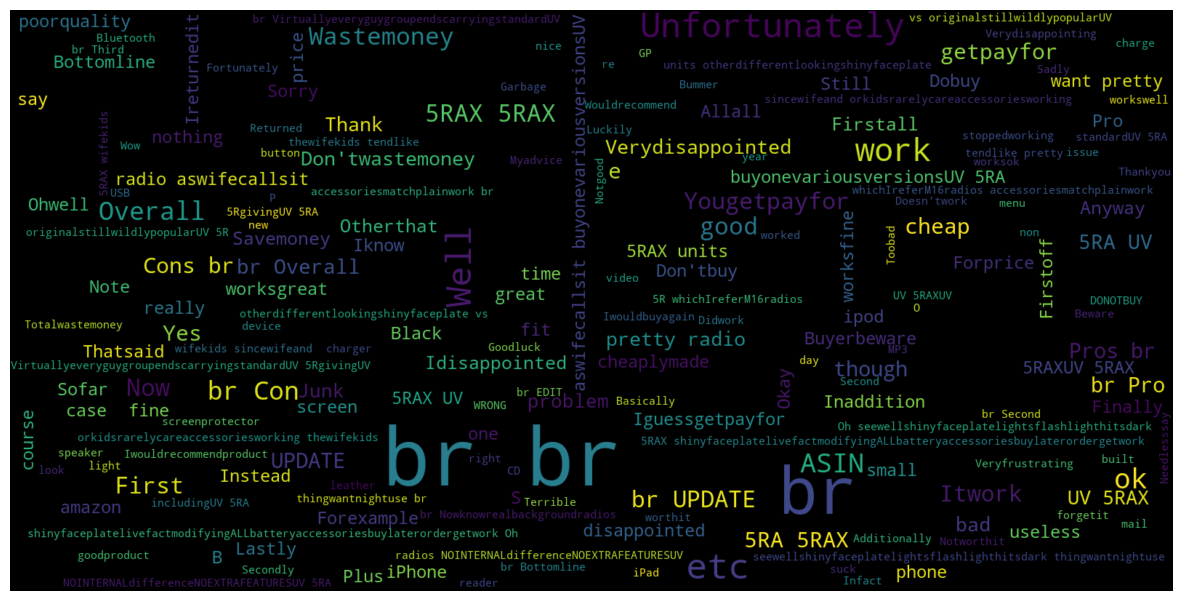

In [23]:
consolidated=' '.join(word for word in data['Review'][data['Sentiment']==0].astype(str))
wordCloud=WordCloud(width=1600,height=800,random_state=21,max_font_size=110)
plt.figure(figsize=(15,10))
plt.imshow(wordCloud.generate(consolidated),interpolation='bilinear')
plt.axis('off')
plt.show()

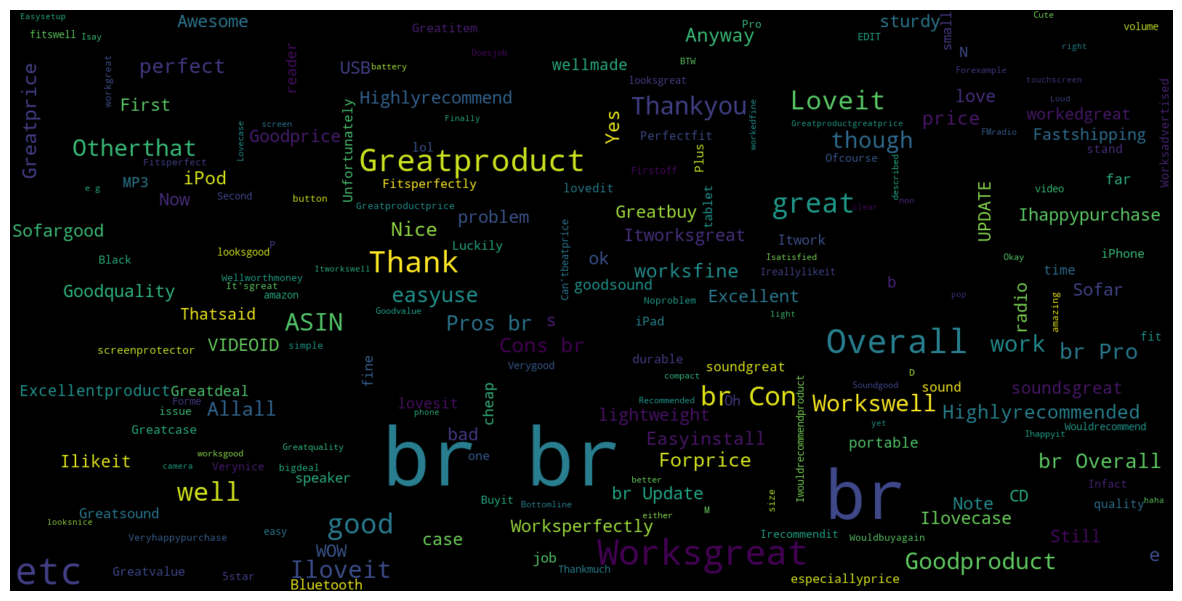

In [24]:
consolidated=' '.join(word for word in data['Review'][data['Sentiment']==1].astype(str))
wordCloud=WordCloud(width=1600,height=800,random_state=21,max_font_size=110)
plt.figure(figsize=(15,10))
plt.imshow(wordCloud.generate(consolidated),interpolation='bilinear')
plt.axis('off')
plt.show()

Converting text into Vectors

In [15]:
cv = TfidfVectorizer(max_features=2500)
X = cv.fit_transform(data['Review'] ).toarray()

In [16]:
cv=TfidfVectorizer(max_features=2500)
X=cv.fit_transform(data['Review']).toarray()

Model training, Evaluation, and Prediction

In [17]:
from sklearn.model_selection import train_test_split
x_train ,x_test,y_train,y_test=train_test_split(X,data['Sentiment'],
                                                test_size=0.25 ,
                                                random_state=42)

In [18]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(X,data['Sentiment'],test_size=.25,random_state=42)

In [19]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

model=LogisticRegression()

#Model fitting
model.fit(x_train,y_train)

#testing the model
pred=model.predict(x_test)

#model accuracy
print(accuracy_score(y_test,pred))




0.67456


In [20]:
from sklearn import metrics
from sklearn.metrics import confusion_matrix

In [21]:
cm=confusion_matrix(y_test,pred)
cm_display=metrics.ConfusionMatrixDisplay(confusion_matrix=cm,display_labels=[False,True])

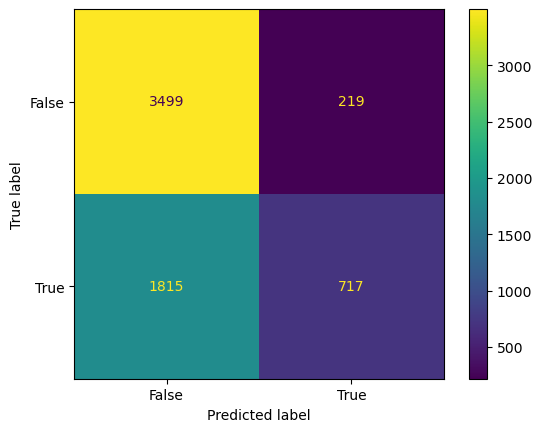

In [22]:
cm_display.plot()